# K Means Clustering

Tingting Yang

INDE 577 - Data Science and Machine Learning

## Introduction

K Means Clustering is a type of unsupervised learning, which is used to identify clusters of data objects in a dataset. 

The goal of K means clustering is to partition a given dataset into a set of K groups/clusters. K is pre-defined by analyst. A large K means smaller groups with more granularity, while a lower K means larger groups with less granularity.

The output of the K means clustering is the "labels". The algorithm assigns each data point to one of the K groups based on the feature similarity. In K means clustering, each group is defined by the **centroid** for each group. The centroids are the center of the cluster, which finds the points closest to them and takes them to the cluster, and thus, minimize the sum of the squared distances to the cluster centroids.

#### Unsupervised Machine Learning

[Unsupervised learning](https://en.wikipedia.org/wiki/Unsupervised_learning) is a type of machine learning using information that is neither classified nor labeled. In other words, you only have input data but no corresponding output variables. And thus, in unsuipervised learning, the algorithms have to work on its own to discover patterns and information in the training data. 

Unsupervised learning problems can be further grouped into **clustering** and **association** problems. 

#### Clustering

The clustering is a data mining technique that mainly deals with finding a structure or pattern in a collection of unlabeled data. It can automatically group the training data into catergories with similar features.



### Algorithm

K means clustering also use the idea that data with similar features "should" be close in space, and aim to minimize the sum of the squared Euclidean distances between the points and the corresponding cluster centroid.


**Input**:
* Feature vectors, $X^1, ..., X^m$
* The number of the pre-defined clusters that need to be separated into, K

**Algorithm**:
* **Step 1**: Randomly choose K distinct feature vectors as your starting "centroid", $c_1, c_2, ..., c_k$
* **Step 2**: Assign each feature vector to the closest centroid, $A_i=\begin{Bmatrix} x: x_i \text { is assigned to }  c_i \end{Bmatrix}$
* **Step 3**: Let $c_i \rightarrow  \frac {1}{|A_i|}\sum_{x\in A_i} x$
* **Step 4**: Repeat Step 2 and Step 3 until the centroids no longer move

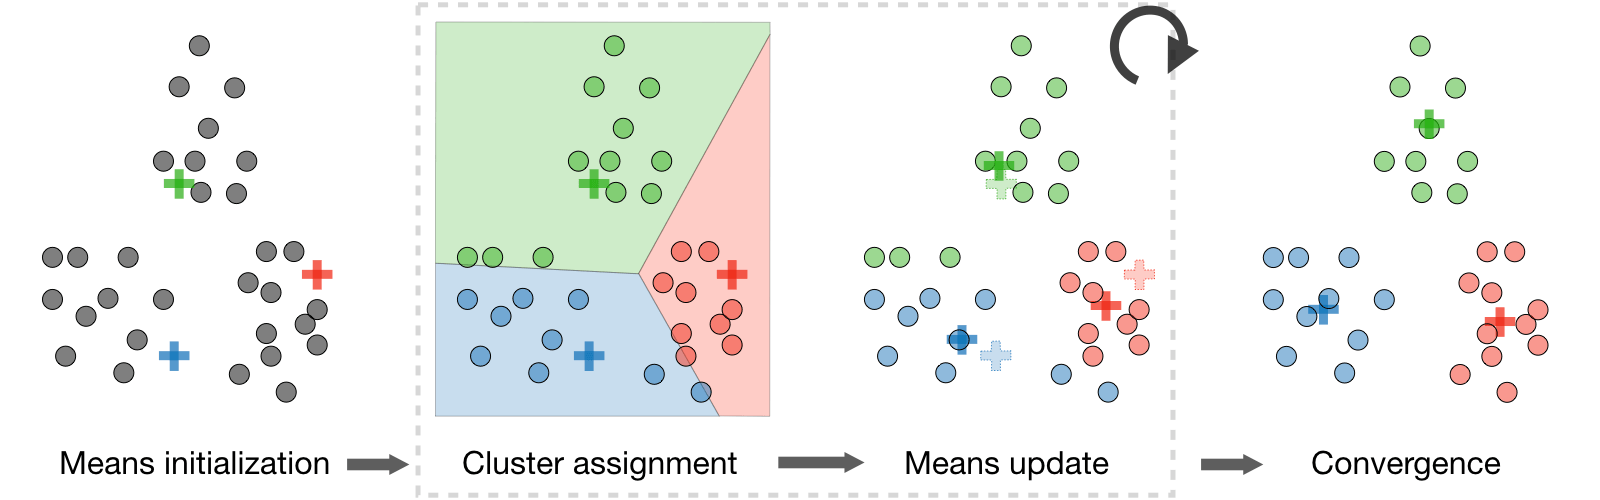

The random initialization of centroids (Step 1) would cause the K means clustering algorithm to be **nondeterministic**. It means that cluster assignments vary if different starting centroids are chose. And thus, we need to run the algorithm more than once and find the best outcome.

**Loss Function**:

For each $A_i$,
$$L=\frac {1}{2} \sum_{x \in A_i} (c_i-x)^2$$
where $x$ is a data point belonging to the cluster $A_i$, and $c_i$ is the centroid of the cluster $A_i$.

#### How to choose K value? - Elbow Method

In K Means Clustering, K value plays a key role in determining the performance of the algorithm. A large K means smaller groups with more granularity, while a lower K means larger groups with less granularity. The [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) is widely used to select the number of clusters. 

In the elbow method, the sum of squared distance between each point and the centroid in the cluster (our loss function above) is calculated for a set of K values. When we plot the loss function with K values, the line is like an elbow, and the elbow point is the optimal K value.

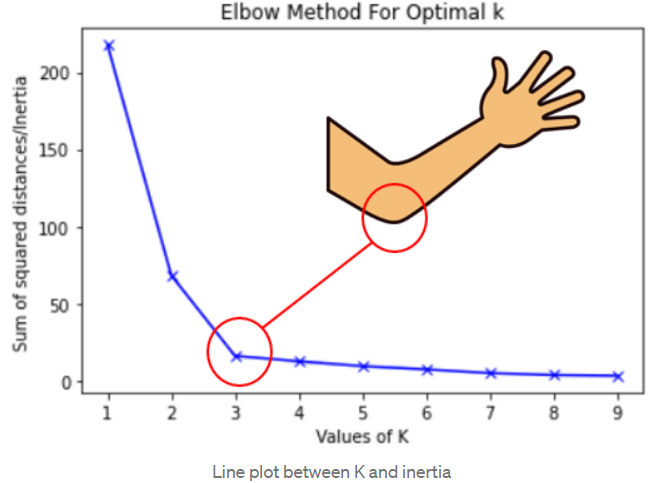

### Principal Component Analysis (PCA)

It is a commong practice to apply principal component analysis (PCA) before a clustering algorithm, e.g., K means clustering. PCA is a technique to reduce the dimensionality of the large dataset. PCA transforms a large set of variables into a smaller one that still contains most of the information. Here, we may need to trade a little accuracy for simplicity. Reducing the number of variables would results in loss of the accuracy, but a smaller dataset are easier to explore and analyze with a shorter processing time. Also, the noise would be reduced when decreasing the number of variables, which can improve the performance of the algorithm.

Principal components (PCs) are defined as a linear combination of the original variables. PCA reduced data by geometrically projecting the data points onto lower dimensions (PCs), with the goal of fiding the best summary of the data using a limited number of PCs. PCA minimizes the perpendicular distance between a data point and the PC. 

To calculate PCA:
* Calculate the mean values of each variables
* Center the values in each variables by subtractiong the corresponding mean values
* Calculate the covariance matrix of the centered matrix
* Calculate the eigendecomposition of the covariance matrix

So far, the eigenvectors is the directions of the reduced subspace, and the eigenvalues is the magnitudes for the direction.

In this notebook, I will use PCA to reduce the dimention of the dataset and compare the performance of the K means clustering algorithm before and after PCA.

---

## Implement

In the following notebook, I will implement the K Means Clustering for species classification using the [Penguin dataset](https://www.kaggle.com/parulpandey/penguin-dataset-the-new-iris). Besides building the K means clustering algorithm, I will also use Principal Component Analysis (PCA) to reduce the dimensions of the dataset, and compare the performance of the K means clustering algorithm before and after PCA.

### About the dataset

The dataset consists of 344 rows and 7 columns. There are three different species of penguins: Chinstrap, Adélie, and Gentoo penguins. The columns are:

* species: penguin species (Chinstrap, Adélie, or Gentoo)
* island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
* bill: bill length (mm)
* bill_depth_mm: bill depth (mm)
* flipper_length_mm: flipper length (mm)
* body_mass_g: body mass (g)
* sex: penguin sex

### Tools

In order to do this, I need the following libraries:

* [matplotlib](http://metplotlib.org)
* [numpy](https://numpy.org/doc/stable/index.html)
* [pandas](http://pandas.pydata.org)
* [sklearn](https://scikit-learn.org/stable/index.html)
    - [decomposition](https://scikit-learn.org/stable/modules/classes.html?highlight=decomposition#module-sklearn.decomposition)
* [seaborn](https://seaborn.pydata.org/)

In [1]:
# Import the necessaty libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
import seaborn as sns

### Data Exploration and Data Wrangling

After import the dataset, we simply check the dimension before implementing the PCA.

In [2]:
# Import Penguins dataset
penguins = pd.read_csv("penguins.csv")

# Remove the rows with NaN values from the dataset
penguins = penguins.dropna()

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [3]:
penguins.shape

(333, 7)

After removing the rows with NaN values from the dataset, the cleaned dataset has 333 rows and 7 columns.

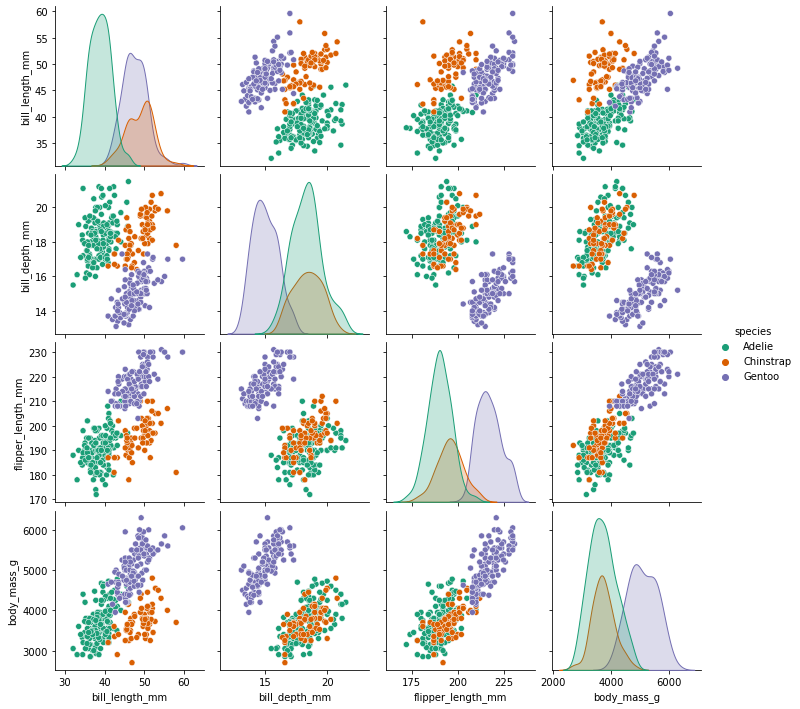

In [4]:
# Plot the scatterplot for each pair of features
sns.pairplot(penguins, hue='species', palette='Dark2')

Before PCA, in some pairs of features, the three penguins species are separated well, while in others, Adelie penguins (green dots) and Chinstrap penguins (orange dots) overlap.

In the meantime, from the above scatter plot, I notice that the 4 variables are not in the same scale, especially the "body_mass_g". The feature "body_mass_g" has a much larger values than other features, which might lead to take more proportion when calculate the distance, and thus, affect the performance of the algorithm.

Therefore, I need to scale the features. I use the [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) tool in sklearn.preprocessing. It can directly standarlize all the features to the same scale.

In [5]:
# Extract out the features, and convert to numpy array
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].to_numpy()
X

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  50.4,   15.7,  222. , 5750. ],
       [  45.2,   14.8,  212. , 5200. ],
       [  49.9,   16.1,  213. , 5400. ]])

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
X

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       ...,
       [ 1.17338426, -0.74499437,  1.50292796,  1.91906927],
       [ 0.22108196, -1.20271231,  0.78837197,  1.23499466],
       [ 1.08181673, -0.54156417,  0.85982757,  1.48374906]])

In [8]:
# Check the dimensions before PCA
X.shape

(333, 4)

Let's implement PCA to reduce the dimension to see whether it can separate the three penguins species better.

For a better comparison, I also plot the scatter plot for the last two features, "flipper_length_mm" vs. "body_mass_g".

In [9]:
# Extract out labels, and convert to numpy array
y = penguins[['species']].to_numpy()

# Change labels to numeric labels
for i, label in enumerate(y):
    if label == "Adelie":
        y[i] = 0.0
    elif label == "Chinstrap":
        y[i] = 1.0
    else:
        y[i] = 2.0

Text(0.5, 1.0, 'Flipper length vs. Body Mass (Before PCA)')

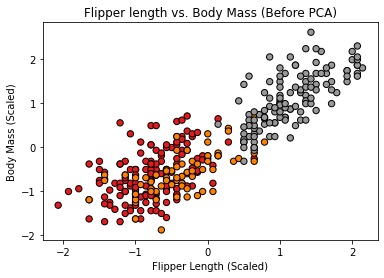

In [10]:
# Plot the scatterplot for the first two features
plt.scatter(X[:, 2], X[:, 3], c=y,
            cmap = plt.cm.Set1,
            edgecolor = "k",
            s = 40)
plt.xlabel('Flipper Length (Scaled)')
plt.ylabel('Body Mass (Scaled)')
plt.title("Flipper length vs. Body Mass (Before PCA)")

### Implement PCA

I implement PCA using the tool, [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA), to reduce the dimension to only two.

In [11]:
# Use PCA to reduce the dimension of the dataset to only 2 dimentions
X_reduced = PCA(n_components = 2).fit_transform(X)

In [12]:
X_reduced.shape

(333, 2)

After PCA, the dimension is reduced to 2.

Let's plot the projected points after PCA. 

Text(0.5, 1.0, 'Penguins Features After PCA')

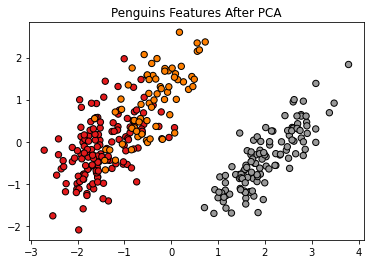

In [13]:
# Plot the features after PCA
plt.scatter(X_reduced[:, 0],
            X_reduced[:, 1],
            c = y,
            cmap = plt.cm.Set1,
            edgecolor = "k",
            s = 40)
plt.title("Penguins Features After PCA")

Compare to the scatter plots before PCA, it seems to have better separation after PCA, that the overlapped area decreases.

However, seeing is not always believing. Let's build a K means clustering algorithm to investigate!

### Build the K Means Clustering Algorithm

#### Initiate K Centroids

Let's try K=2 on the original dataset before PCA.

In [14]:
# Randomly select K starting centroids
k = 2
C = []
for _ in range(k):
    i = np.random.randint(len(X))
    C.append(X[i, :])

In [15]:
# Check the dimension of the centroids
C

[array([ 0.27602248, -1.10099721,  1.36001676,  0.98624025]),
 array([ 0.45915754,  0.37387171, -0.64073999, -0.87941779])]

The randomly selected centroids have the same number of features (4 variables) as the original Penguins dataset.

#### Define Distance between Points

To calculate the Euclidean distance between two points:

$$d(p, q) = \sqrt {\sum_{i=1}^{n}(p_i-q_i)^2}$$

In [16]:
# Define the distance function to calculate Euclidean distance between two points
def distance(v, w):
    return np.sqrt((v - w) @ (v - w))

In [17]:
# Check the distance function between one of the first centroid and the first data point in the dataset
distance(C[0], X[0])

3.8855960480378355

#### Define the Assignment Function

This function is to calculate the distance from each point to every centroid, and return the index of the nearest centroid.

In [18]:
# Define Assignment function
def assignment(x, Centroids):
    distances = np.array([distance(x, centroid) for centroid in Centroids])
    return np.argmin(distances)

In [19]:
# Check the Assignment function on the first data point in the dataset
assignment(X[0], C)

1

We can also draw a scatter plot to see the assignment for the first set of centroids.

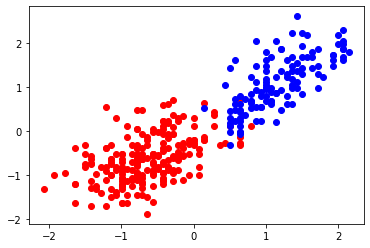

In [20]:
# Scatter plot to show the assignments
for x in X:
    
    # Mark the points assigned to the first cluster in blue
    if assignment(x, C) == 0:
        plt.scatter(x[2], x[3], color = "blue")
        
    # Mark the points assigned to the second cluster in red
    else:
        plt.scatter(x[2], x[3], color = "red")
        
plt.show()

From the scatter plot, we can find that there are a small part of points are assigned to the second cluster. 

Next, we should group up the points assigned to the same cluster, and update the centroids.

#### Group up the Assigned Points

To group up the points that assigned to the same cluster, we define a function names "make_classes".

In [21]:
# Define a function to group up the assigned points
def make_classes(data, Centroids):
    A = dict()
    
    # Make the lists for every centroid separately
    for i in range(len(Centroids)):
        A[i] = []
    
    # Assigned every data points to the class list
    for x in data:
        A[assignment(x, Centroids)].append(x)
        
    return A

In [22]:
# Check the functions
A = make_classes(X, C)
A[0][:5]

[array([ 0.38590351, -2.01643309,  0.71691638,  0.36435424]),
 array([ 1.10013024, -0.43984907,  2.07457274,  1.85688067]),
 array([ 0.86205466, -1.55871515,  0.64546078,  0.30216564]),
 array([ 1.10013024, -0.99928211,  1.21710556,  1.85688067]),
 array([ 0.6606061 , -1.35528496,  1.00273877,  1.48374906])]

The printed 5 points in consistent to the blue points in the above scatter plot, suggesting that the "make_classes" function works well.

#### Update the Centroids

To update the centroids, we calculate the mean points for every class and move the centroids to the mean points.
$$c_i \rightarrow  \frac {1}{|A_i|}\sum_{x\in A_i} x$$

In [23]:
# Update the centroids
def new_centroids(data, Centroids):
    new_Centroids = []
    A = make_classes(data, Centroids)
    
    # Calculate the mean points for every class
    for i in range(len(Centroids)):
        new_Centroids.append((1/len(A[i]))*sum(A[i]))
        
    return new_Centroids

Let's check the function!

In [24]:
new_C = new_centroids(X, C)

In [25]:
C

[array([ 0.27602248, -1.10099721,  1.36001676,  0.98624025]),
 array([ 0.45915754,  0.37387171, -0.64073999, -0.87941779])]

In [26]:
new_C

[array([ 0.65475809, -1.10270671,  1.16246305,  1.10121078]),
 array([-0.36409445,  0.61318738, -0.64641637, -0.61235553])]

The centroids moved! And the new centroids fit our prediction made by looking the scatter plot above. They seem to be located at the center of the clusters.

Then we can put the functions for algorithm together and try for 4 iterations to see the changes of the assignment and have a intuitive impression on how the K Means algorithm work.

In [27]:
# Define a function to randomly initiate the starting centoids
def initialize_centroids(data, k = 2):
    Centroids = []
    for _ in range(k):
        i = np.random.randint(len(X))
        Centroids.append(X[i, :])
    return Centroids

# Define Assignment function
def assignment(x, Centroids):
    distances = np.array([distance(x, centroid) for centroid in Centroids])
    return np.argmin(distances)

# Define a function to group up the assigned points
def make_classes(data, Centroids):
    A = dict()
    for i in range(len(Centroids)):
        A[i] = []
    for x in data:
        A[assignment(x, Centroids)].append(x)       
    return A

# Update the centroids
def new_centroids(data, Centroids):
    new_Centroids = []
    A = make_classes(data, Centroids)
    for i in range(len(Centroids)):
        new_Centroids.append((1/len(A[i]))*sum(A[i]))   
    return new_Centroids

In [28]:
# Set K=3 and Try 4 iterations
k = 3
C0 = initialize_centroids(X, k = k)
C1 = new_centroids(X, C0)
C2 = new_centroids(X, C1)
C3 = new_centroids(X, C2)

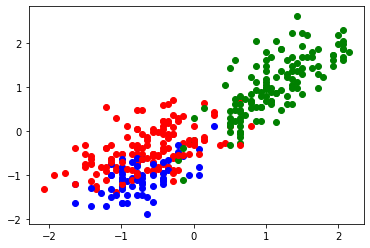

In [29]:
# Scatter plot for the first round assignment with the starting centroids
for x in X:
    if assignment(x, C0) == 0:
        plt.scatter(x[2], x[3], color = "blue")
    elif assignment(x, C0) == 1:
        plt.scatter(x[2], x[3], color = "green")
    else:
        plt.scatter(x[2], x[3], color = "red")

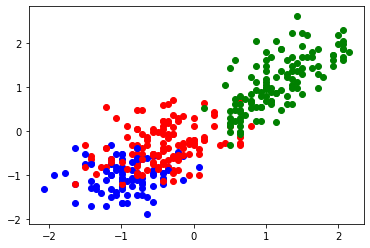

In [30]:
# Scatter plot for the second round assignment with the first updated centroids
for x in X:
    if assignment(x, C1) == 0:
        plt.scatter(x[2], x[3], color = "blue")
    elif assignment(x, C1) == 1:
        plt.scatter(x[2], x[3], color = "green")
    else:
        plt.scatter(x[2], x[3], color = "red")

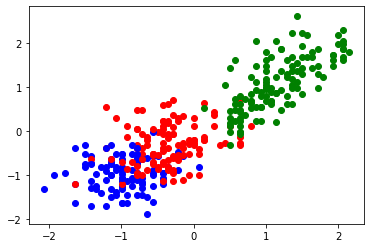

In [31]:
# Scatter plot for the third round assignment with the second updated centroids
for x in X:
    if assignment(x, C2) == 0:
        plt.scatter(x[2], x[3], color = "blue")
    elif assignment(x, C2) == 1:
        plt.scatter(x[2], x[3], color = "green")
    else:
        plt.scatter(x[2], x[3], color = "red")

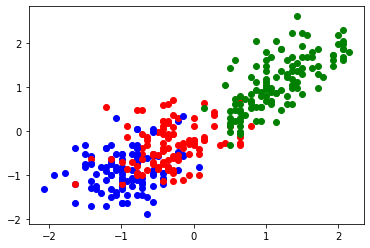

In [32]:
# Scatter plot for the third round assignment with the second updated centroids
for x in X:
    if assignment(x, C3) == 0:
        plt.scatter(x[2], x[3], color = "blue")
    elif assignment(x, C3) == 1:
        plt.scatter(x[2], x[3], color = "green")
    else:
        plt.scatter(x[2], x[3], color = "red")

From the above 4 plots, we can find that some points which are near the bounder of clusters change color when centroids updated.

#### Fitting and Prediction

Then we define the fitting function.

The stop criteria should be set. Once the max iteration is reached or the maximun of the distances between previous centroids and updated centroids is less than epsilon value, the iterations would stop.

We set the defult max iteration at 100 times and the epsilon equal to $0.01$. 

In [33]:
def fit(data, k = 3, max_iterations = 100, epsilon = 0.01):
    C_old = initialize_centroids(X, k = k)
    C_new = new_centroids(data, C_old)  
    
# try to achieve stpe 4 to find the centroids no longer move below:
    centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
    iterations = 0
    while max(centroid_distances) > epsilon and iterations < max_iterations:
        C_old, C_new = C_new, new_centroids(data, C_new)
        centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
        iterations +=1
        
    return C_new

#### Define Loss Function

For each $A_i$,
$$L=\frac {1}{2} \sum_{x \in A_i} (c_i-x)^2$$
where $x$ is a data point belonging to the cluster $A_i$, and $c_i$ is the centroid of the cluster $A_i$.

In [34]:
def mse_classes(data, Centroids):
    errors = []
    A_classes = make_classes(data, Centroids)
    for i, centroid in enumerate(Centroids):
        error = sum(0.5*(centroid - a) @ (centroid - a) for a in A_classes[i])
        errors.append(error)
        
    return sum(x for x in errors)

So far, the basic of the K Means Clustering algorithm is built. Let's put all the functions together.

In [35]:
# Define a function to randomly initiate the starting centoids
def initialize_centroids(data, k = 3):
    Centroids = []
    for _ in range(k):
        i = np.random.randint(len(X))
        Centroids.append(X[i, :])
    return Centroids

# Define Assignment function
def assignment(x, Centroids):
    distances = np.array([distance(x, centroid) for centroid in Centroids])
    return np.argmin(distances)

# Define a function to group up the assigned points
def make_classes(data, Centroids):
    A = dict()
    for i in range(len(Centroids)):
        A[i] = []
    for x in data:
        A[assignment(x, Centroids)].append(x)       
    return A

# Update the centroids
def new_centroids(data, Centroids):
    new_Centroids = []
    A = make_classes(data, Centroids)
    for i in range(len(Centroids)):
        new_Centroids.append((1/len(A[i]))*sum(A[i]))   
    return new_Centroids

# Define the fitting function
def fit(data, k = 3, max_iterations = 100, epsilon = 0.01):
    C_old = initialize_centroids(X, k = k)
    C_new = new_centroids(data, C_old)  
    centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
    iterations = 0
    while max(centroid_distances) > epsilon and iterations < max_iterations:
        C_old, C_new = C_new, new_centroids(data, C_new)
        centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
        iterations +=1  
    return C_new

# Define the Loss function
def mse_classes(data, Centroids):
    errors = []
    A_classes = make_classes(data, Centroids)
    for i, centroid in enumerate(Centroids):
        error = sum(0.5*(centroid - a) @ (centroid - a) for a in A_classes[i])
        errors.append(error)
        
    return sum(x for x in errors)

In [36]:
# Check the MSE after fitting
C = fit(X)
print(mse_classes(X, C))

185.38307175675354


The MSE here now is reasonable! 

When I used the original dataset to implement, the MSE was really huge. That might because the original value of "body_mass_g" is much larger than others. And thus, I scale all the features and re-run the codes. Now is much better! 

Then the next question for us is how to choose a suitable K value.

#### Choose the K Value by Elbow Method

Then we use the elbow method to find the optimal K value for this dataset. When we plot the loss function with K values, the elbow point is the optimal K value.

In [37]:
# Fit the model for K from 1 to 6
C1 = fit(X, k = 1)
C2 = fit(X, k = 2)
C3 = fit(X, k = 3)
C4 = fit(X, k = 4)
C5 = fit(X, k = 5)
C6 = fit(X, k = 6)
#C7 = fit(X, k = 7)
#C8 = fit(X, k = 8)
#C9 = fit(X, k = 9)
C = [C2, C3, C4, C5, C6]

Text(0.5, 1.0, 'K Values vs. MSE')

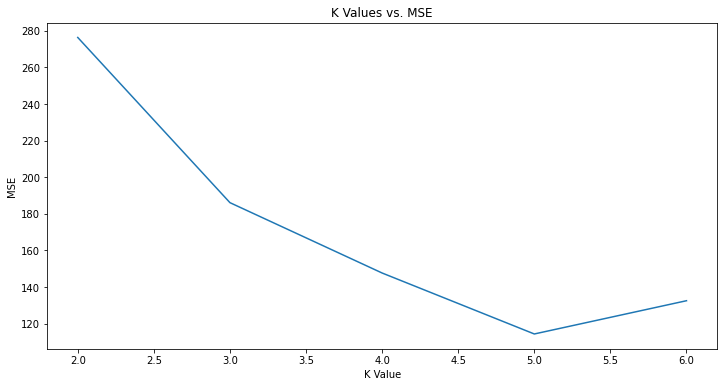

In [38]:
# Plot the loss function with K values
errors = [mse_classes(X, centroids) for centroids in C]
plt.figure(figsize=(12, 6))
plt.plot([i for i in range(2, 7)], errors)
plt.xlabel("K Value")
plt.ylabel("MSE")
plt.title("K Values vs. MSE")

From the plot, K=3 is the elbow point, which is consistent to the original number of the labels in the Penguins dataset.

---

### Implement K Means Clustering after PCA

Next, let's explore whether the reduction of dimension affect the performance of K Means Clustering.

In [39]:
# Define a function to randomly initiate the starting centoids
def initialize_centroids(data, k = 3):
    Centroids = []
    for _ in range(k):
        i = np.random.randint(len(X_reduced))
        Centroids.append(X_reduced[i, :])
    return Centroids

# Define Assignment function
def assignment(x, Centroids):
    distances = np.array([distance(x, centroid) for centroid in Centroids])
    return np.argmin(distances)

# Define a function to group up the assigned points
def make_classes(data, Centroids):
    A = dict()
    for i in range(len(Centroids)):
        A[i] = []
    for x in data:
        A[assignment(x, Centroids)].append(x)       
    return A

# Update the centroids
def new_centroids(data, Centroids):
    new_Centroids = []
    A = make_classes(data, Centroids)
    for i in range(len(Centroids)):
        new_Centroids.append((1/len(A[i]))*sum(A[i]))   
    return new_Centroids

# Define the fitting function
def fit(data, k = 3, max_iterations = 100, epsilon = 0.01):
    C_old = initialize_centroids(X_reduced, k = k)
    C_new = new_centroids(data, C_old)  
    centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
    iterations = 0
    while max(centroid_distances) > epsilon and iterations < max_iterations:
        C_old, C_new = C_new, new_centroids(data, C_new)
        centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
        iterations +=1  
    return C_new

# Define the Loss function
def mse_classes(data, Centroids):
    errors = []
    A_classes = make_classes(data, Centroids)
    for i, centroid in enumerate(Centroids):
        error = sum(0.5*(centroid - a) @ (centroid - a) for a in A_classes[i])
        errors.append(error)
        
    return sum(x for x in errors)

In [40]:
# Check the MSE after fitting
C = fit(X_reduced)
print(mse_classes(X_reduced, C))

111.80760258001885


The MSE is smaller than the MSE of the model before PCA when K=3, suggesting that after PCA, the K Means Clustering algorithm perform better when K=3.

We can also use the elbow method to find the optimal K value.

In [41]:
# Fit the model for K from 1 to 8
C1 = fit(X_reduced, k = 1)
C2 = fit(X_reduced, k = 2)
C3 = fit(X_reduced, k = 3)
C4 = fit(X_reduced, k = 4)
C5 = fit(X_reduced, k = 5)
C6 = fit(X_reduced, k = 6)
C7 = fit(X_reduced, k = 7)
C8 = fit(X_reduced, k = 8)
#C9 = fit(X_reduced, k = 9)
C = [C2, C3, C4, C5, C6, C7, C8]

Text(0.5, 1.0, 'K Values vs. MSE')

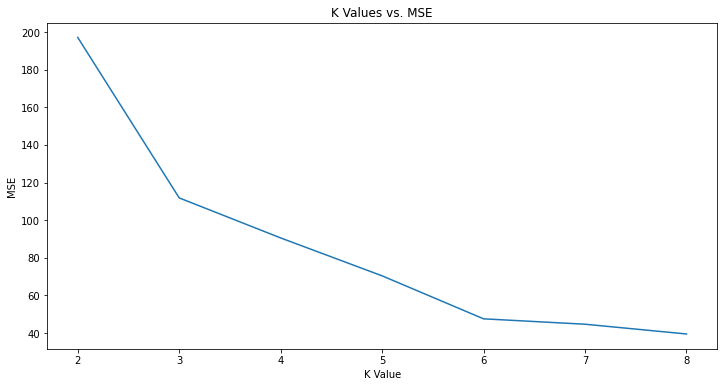

In [42]:
# Plot the loss function with K values
errors = [mse_classes(X_reduced, centroids) for centroids in C]
plt.figure(figsize=(12, 6))
plt.plot([i for i in range(2, 9)], errors)
plt.xlabel("K Value")
plt.ylabel("MSE")
plt.title("K Values vs. MSE")

After PCA, the K=3 is also the elbow point, which is also consistent to the original number of the labels in the Penguins dataset. Also, K=6 is also an optimal value.

In the meantime, all the MSE values are smaller than the ones before PCA with the same K value. This also means, after PCA, the K Means Clustering algorithm perform better.

---

## Conclusion

* The K Means Clustering algorithm works well!
* Reducing dimension using PCA before the impleting K mean Clustering can improve the performance.
* Need to scale the data if the features are not in the same scale.